# Classification


In [303]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Préparation des données


In [304]:
from src.utils import load_dataframe, preprocess_dataframe

In [305]:
df_train = load_dataframe(train=True)
df_train = preprocess_dataframe(df_train)

In [306]:
# Set team rocket as bool
df_train["Team Rocket"] = df_train["Team Rocket"].map({"Yes": 1, "No": 0})
df_train["Team Rocket"] = df_train["Team Rocket"].astype("bool")

In [307]:
display(df_train)

,ID,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
0,0,27,Pewter City,Middle,Fisherman,Rock,50,False,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False
1,1,55,Viridian City,Middle,PokéMart Seller,Grass,35,True,HealBall,53,2,False,Unpredictable,19,False,177516,True,True
2,2,14,Pallet Town,High,Police Officer,Poison,96,False,NetBall,76,5,False,Aggressive,18,False,85695,True,False
3,3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,False,UltraBall,27,0,False,Defensive,10,False,39739,True,False
4,4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,True,HealBall,51,1,False,Aggressive,17,True,126923,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,30,Viridian City,Low,Rocket Grunt,Steel,28,False,TimerBall,41,0,False,Unpredictable,13,False,92903,True,False
3996,3996,20,Cerulean City,Low,Casino Worker,Electric,100,False,UltraBall,65,3,False,Unpredictable,7,False,27555,True,False
3997,3997,27,Fuchsia City,Middle,Scientist,Rock,49,False,MasterBall,60,1,False,Unpredictable,4,False,34772,True,False
3998,3998,66,Vermilion City,Low,Rocket Grunt,Electric,58,False,DuskBall,61,8,False,Defensive,12,False,70341,True,False


In [308]:
print(df_train.info())
display(df_train)

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   ID                      4000 non-null   int64   
 1   Age                     4000 non-null   int64   
 2   City                    4000 non-null   category
 3   Economic Status         4000 non-null   category
 4   Profession              4000 non-null   category
 5   Most Used Pokemon Type  4000 non-null   category
 6   Average Pokemon Level   4000 non-null   int64   
 7   Criminal Record         4000 non-null   bool    
 8   PokéBall Usage          4000 non-null   category
 9   Win Ratio               4000 non-null   int64   
 10  Number of Gym Badges    4000 non-null   int64   
 11  Is Pokemon Champion     4000 non-null   bool    
 12  Battle Strategy         4000 non-null   category
 13  Number of Migrations    4000 non-null   int64   
 14  Rare Item Holder        4000 

,ID,Age,City,Economic Status,Profession,Most Used Pokemon Type,Average Pokemon Level,Criminal Record,PokéBall Usage,Win Ratio,Number of Gym Badges,Is Pokemon Champion,Battle Strategy,Number of Migrations,Rare Item Holder,Debt to Kanto,Charity Participation,Team Rocket
0,0,27,Pewter City,Middle,Fisherman,Rock,50,False,DuskBall,51,1,False,Unpredictable,25,False,24511,True,False
1,1,55,Viridian City,Middle,PokéMart Seller,Grass,35,True,HealBall,53,2,False,Unpredictable,19,False,177516,True,True
2,2,14,Pallet Town,High,Police Officer,Poison,96,False,NetBall,76,5,False,Aggressive,18,False,85695,True,False
3,3,41,Cerulean City,Middle,Gym Leader Assistant,Dragon,23,False,UltraBall,27,0,False,Defensive,10,False,39739,True,False
4,4,15,Pallet Town,Middle,Gym Leader Assistant,Ground,16,True,HealBall,51,1,False,Aggressive,17,True,126923,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3995,30,Viridian City,Low,Rocket Grunt,Steel,28,False,TimerBall,41,0,False,Unpredictable,13,False,92903,True,False
3996,3996,20,Cerulean City,Low,Casino Worker,Electric,100,False,UltraBall,65,3,False,Unpredictable,7,False,27555,True,False
3997,3997,27,Fuchsia City,Middle,Scientist,Rock,49,False,MasterBall,60,1,False,Unpredictable,4,False,34772,True,False
3998,3998,66,Vermilion City,Low,Rocket Grunt,Electric,58,False,DuskBall,61,8,False,Defensive,12,False,70341,True,False


## Régression logistique


### Séparation des données


In [309]:
X = df_train.drop(columns=["Team Rocket"])
y = df_train["Team Rocket"]

### Prétraitement des données


In [310]:
# Turn categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

### Division en train/test


In [311]:
from sklearn.model_selection import train_test_split

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2
) # random_state can be set if needed

### Centrage et réduction


In [312]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

### Entraînement du modèle


In [313]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

### Évaluration du modèle


              precision    recall  f1-score   support

       False       0.99      1.00      1.00       658
        True       1.00      0.96      0.98       142

    accuracy                           0.99       800
   macro avg       1.00      0.98      0.99       800
weighted avg       0.99      0.99      0.99       800



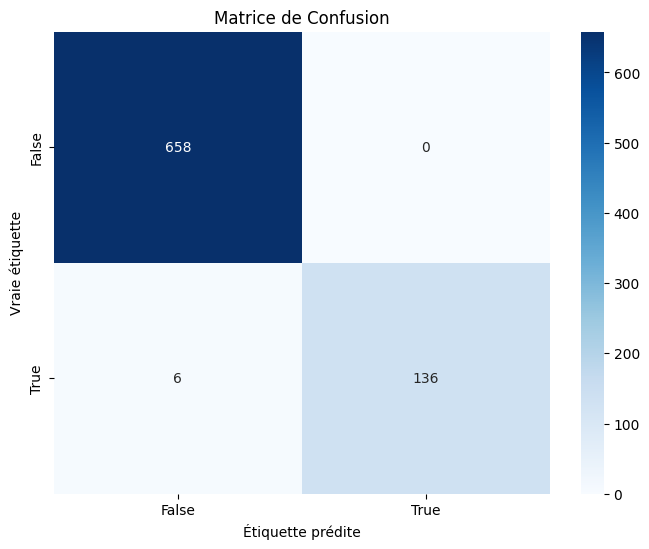

In [314]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Matrice de Confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_,
)
plt.title("Matrice de Confusion")
plt.ylabel("Vraie étiquette")
plt.xlabel("Étiquette prédite")
plt.show()

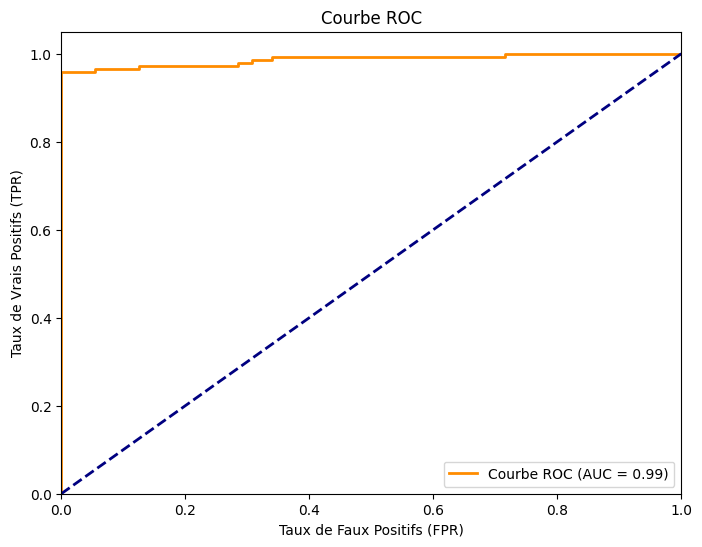

In [315]:
# Courbe ROC et AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilités pour la classe positive
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"Courbe ROC (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs (FPR)")
plt.ylabel("Taux de Vrais Positifs (TPR)")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()

Le modèle de régression logistique attribue à chaque individu une classe en fonction d'une probabilité. La décision de classe est prise en fonction d'un seuil. Pour la courbe ROC, on fait varier ce seuil entre 0 et 1 et on observe l'impact sur le taux de faux positifs et le taux de vrais positifs. Le coin en haut à droite correspond à un seuil éga très proche de 1, et le coin en bas à gauche correspond à un seuil très proche de 0.

**Remarque :**
L'aire sous la courbe ROC (AUC) est une mesure de la performance du modèle de classification. Elle définie comme suit :
$$AUC = \int_{0}^{1} TPR(FPR)  \ \mathrm{d}FPR$$

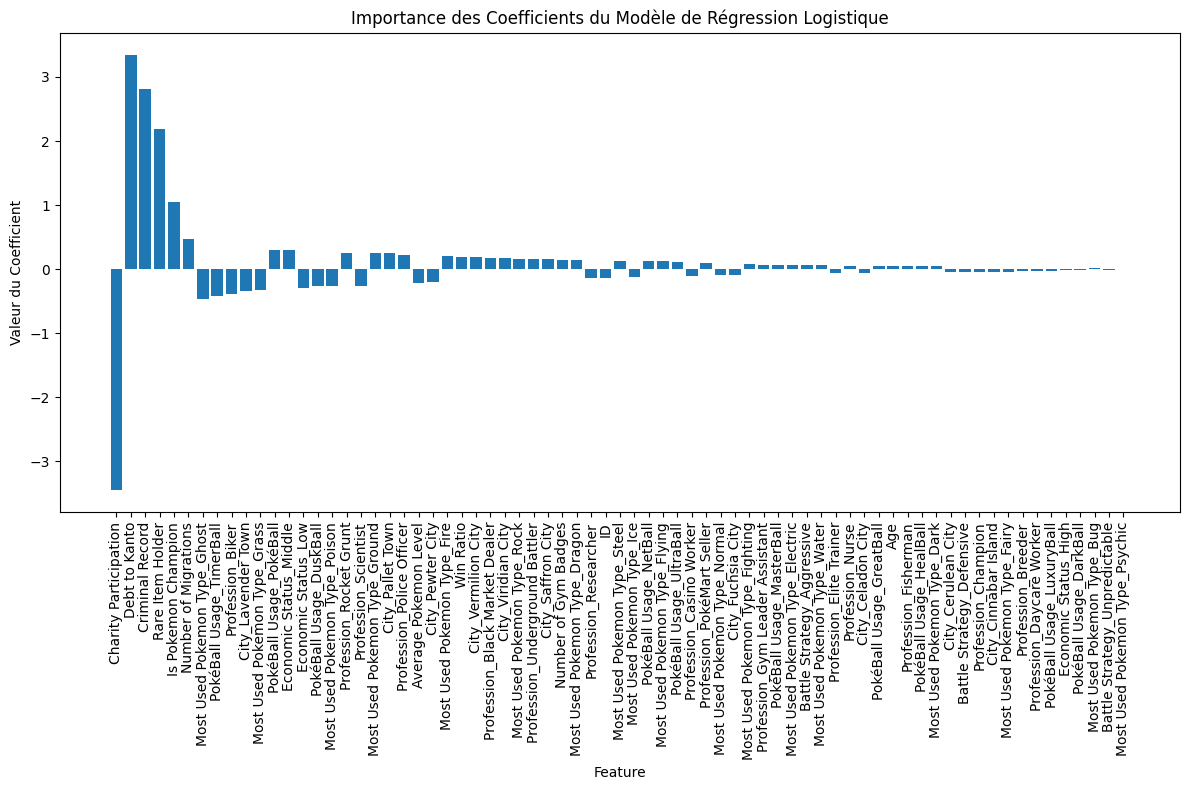

In [316]:
# Importance des coefficients (si les features sont standardisées)
# S'assurer que X_train_raw.columns est disponible et correspond aux features après get_dummies
if hasattr(scaler, "mean_"):  # Vérifie si le scaler a été fitté
    try:
        feature_names = (
            X_train_raw.columns
        )  # Ou X.columns si X_train_raw n'est pas directement accessible ici
        # et que X a les mêmes colonnes après get_dummies
        coefficients = model.coef_[0]

        plt.figure(figsize=(12, 8))
        # Trier les coefficients pour une meilleure visualisation
        sorted_indices = np.argsort(np.abs(coefficients))[::-1]
        plt.bar(range(len(coefficients)), coefficients[sorted_indices], align="center")
        plt.xticks(range(len(coefficients)), feature_names[sorted_indices], rotation=90)
        plt.title("Importance des Coefficients du Modèle de Régression Logistique")
        plt.ylabel("Valeur du Coefficient")
        plt.xlabel("Feature")
        plt.tight_layout()
        plt.show()
    except NameError:
        print(
            "X_train_raw.columns n'est pas défini. Assurez-vous que les noms des features sont accessibles."
        )
    except IndexError:
        print("Problème avec les dimensions des coefficients ou des noms de features.")

# ...existing code...